## Global Imports

In [1]:
from qiskit.circuit.library import TwoLocal
import random

## Local Imports

In [2]:
from hamiltonians import gen_trans_ising_op, get_exact_ground
from mub_state_gen import generate_all_subsets, generate_mub_state_circ
from landscape import calculate_energy_landscape, find_k_best_points
from graphing import display_energy_landscape, display_energy_histogram
from vqe import Parameters, get_standard_params, run_vqe_experiment

## Example: generate operator, calculate landscape, show results

In [4]:
n_qubits = 3
n_mub_qubits = 3

zz_coeff = random.uniform(0,1)
x_coeff = random.uniform(0,1)
op = gen_trans_ising_op(n_qubits, zz_coeff, x_coeff)
ansatz = TwoLocal(3, 'ry', 'cx', 'linear', reps=2, insert_barriers=True).decompose()
zeroset_anastz = ansatz.assign_parameters([0.0]*ansatz.num_parameters)
print(zeroset_anastz)
print(f"attempting all MUB states over the operator {op}")
results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits), appended_ansatz=zeroset_anastz)
exact_result = get_exact_ground(op)
results.exact_value = exact_result

     ┌───────┐ ░            ░ ┌───────┐ ░            ░ ┌───────┐
q_0: ┤ Ry(0) ├─░───■────────░─┤ Ry(0) ├─░───■────────░─┤ Ry(0) ├
     ├───────┤ ░ ┌─┴─┐      ░ ├───────┤ ░ ┌─┴─┐      ░ ├───────┤
q_1: ┤ Ry(0) ├─░─┤ X ├──■───░─┤ Ry(0) ├─░─┤ X ├──■───░─┤ Ry(0) ├
     ├───────┤ ░ └───┘┌─┴─┐ ░ ├───────┤ ░ └───┘┌─┴─┐ ░ ├───────┤
q_2: ┤ Ry(0) ├─░──────┤ X ├─░─┤ Ry(0) ├─░──────┤ X ├─░─┤ Ry(0) ├
     └───────┘ ░      └───┘ ░ └───────┘ ░      └───┘ ░ └───────┘
attempting all MUB states over the operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.75057176+0.j, 0.75057176+0.j, 0.97015945+0.j, 0.97015945+0.j,
 0.97015945+0.j])


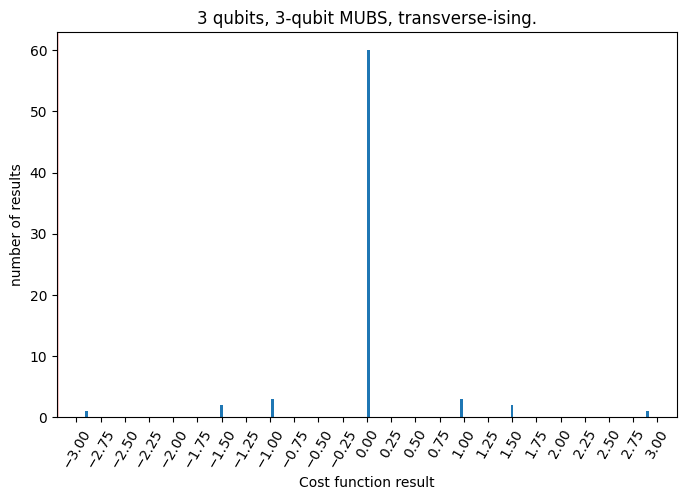

In [5]:
display_energy_histogram(results, graph_title=f"{n_qubits} qubits, {n_mub_qubits}-qubit MUBS, transverse-ising.", bins=200)

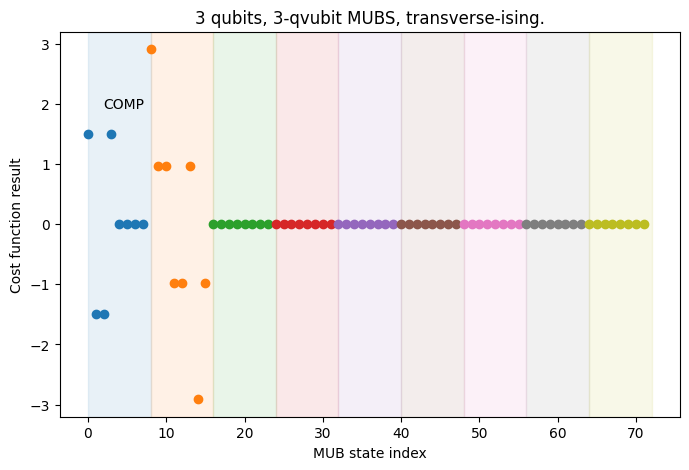

In [6]:
display_energy_landscape(results, graph_title=f"{n_qubits} qubits, {n_mub_qubits}-qvubit MUBS, transverse-ising.")

## Convincing results
What results dfo I want o show Tal and Dekel so they'll be convicned that what I did here shows anything?

1.  Show that when genrating 3-qubit full-MUB states using Trasnverse Ising, the best starting points are *clearly* not in the comp. basis.
    Do so by giving 2-3 examples of such generated Hamiltonians.

2.  Show that the rest of the results bunch around a VERY specific area in the cost, perhaps indicating a BP.
    Another, more pessimistic way to see this is that MUBs only give an advantage in a very small number of cases.
    Use the same graphs.

3.  Show that when we do Half-MUBs, the answers drastically drift away from the correct result. However, non-comps still lead to victory.
    Do so by giving 4-5 graphs with increasing qubit count, showing the distinct difference.

attempting all MUB states over the operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.75257249+0.j, 0.75257249+0.j, 0.4502077 +0.j, 0.4502077 +0.j,
 0.4502077 +0.j])
Energy Landscape:


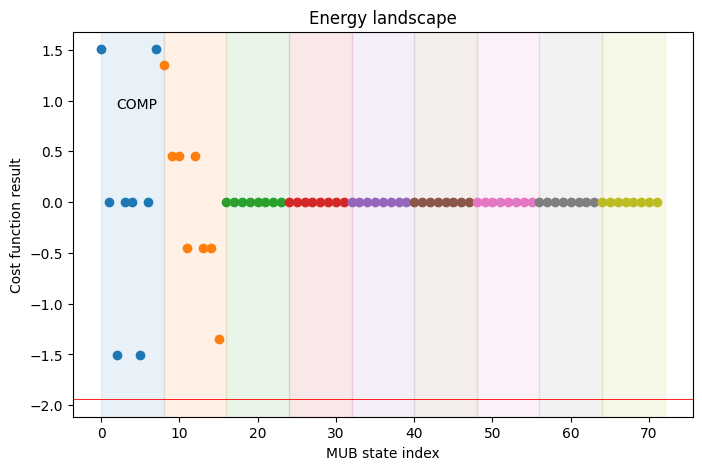

Energy Histogram:


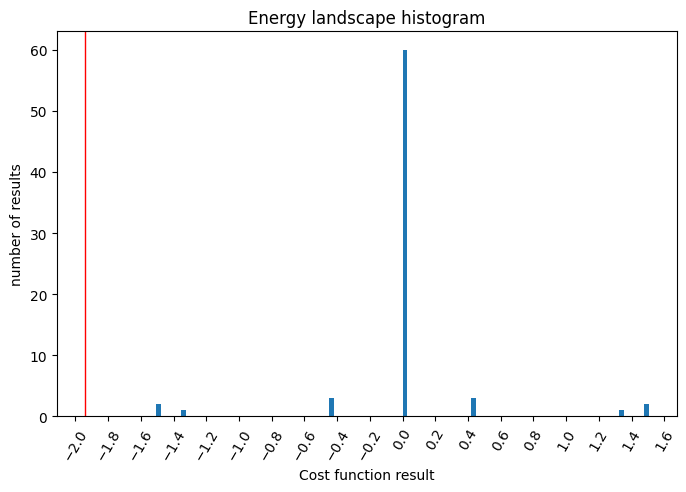

attempting all MUB states over the operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.4021359+0.j, 0.4021359+0.j, 0.1239964+0.j, 0.1239964+0.j, 0.1239964+0.j])
Energy Landscape:


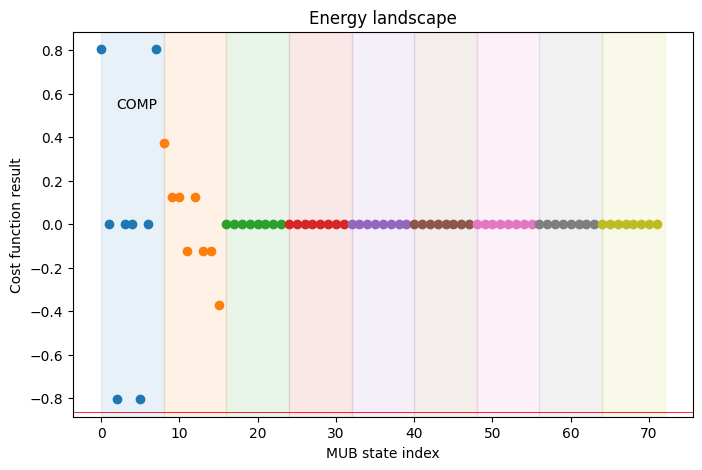

Energy Histogram:


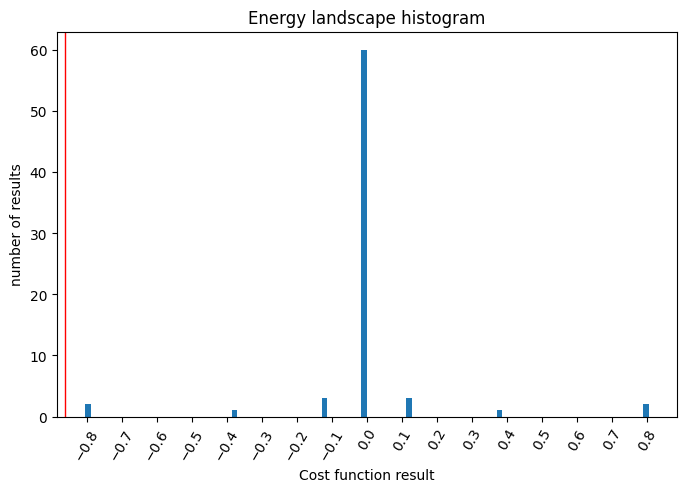

attempting all MUB states over the operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.93229857+0.j, 0.93229857+0.j, 0.7391811 +0.j, 0.7391811 +0.j,
 0.7391811 +0.j])
Energy Landscape:


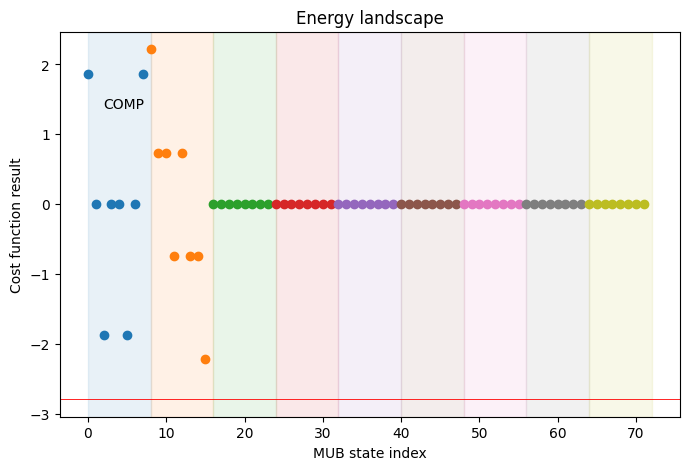

Energy Histogram:


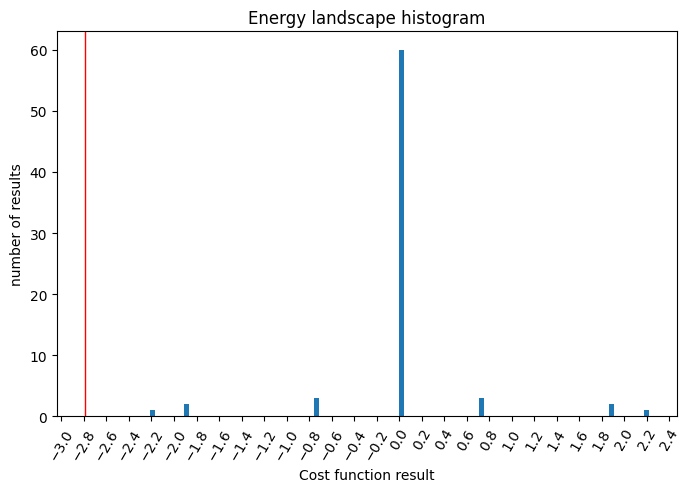

In [25]:
# 3-qubit experiments
n_qubits = 3
n_mub_qubits = 3

for _ in range(3):  # Three examples
    zz_coeff = random.uniform(0,1)
    x_coeff = random.uniform(0,1)
    op = gen_trans_ising_op(n_qubits, zz_coeff, x_coeff)
    print(f"attempting all MUB states over the operator {op}")
    results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits))
    results.exact_value = get_exact_ground(op)
    print("Energy Landscape:")
    display_energy_landscape(results)
    print("Energy Histogram:")
    display_energy_histogram(results)

attempting all MUB states over the operator SparsePauliOp(['ZZII', 'IZZI', 'IIZZ', 'XIII', 'IXII', 'IIXI', 'IIIX'],
              coeffs=[0.17375185+0.j, 0.17375185+0.j, 0.17375185+0.j, 0.95087975+0.j,
 0.95087975+0.j, 0.95087975+0.j, 0.95087975+0.j])
Energy Landscape:


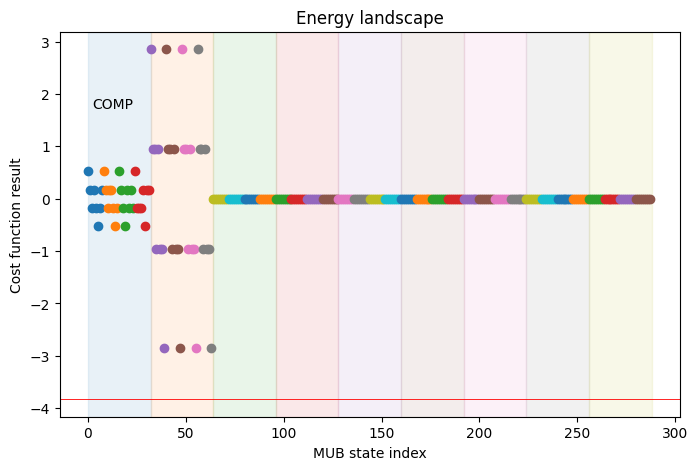

Energy Histogram:


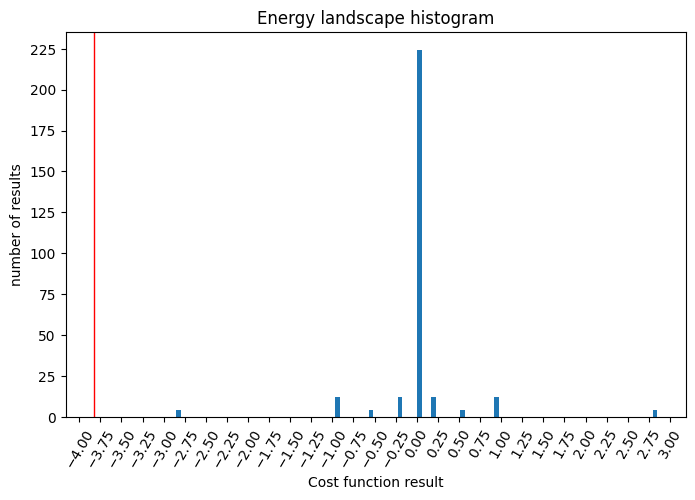

attempting all MUB states over the operator SparsePauliOp(['ZZIII', 'IZZII', 'IIZZI', 'IIIZZ', 'XIIII', 'IXIII', 'IIXII', 'IIIXI', 'IIIIX'],
              coeffs=[0.17375185+0.j, 0.17375185+0.j, 0.17375185+0.j, 0.17375185+0.j,
 0.95087975+0.j, 0.95087975+0.j, 0.95087975+0.j, 0.95087975+0.j,
 0.95087975+0.j])
Energy Landscape:


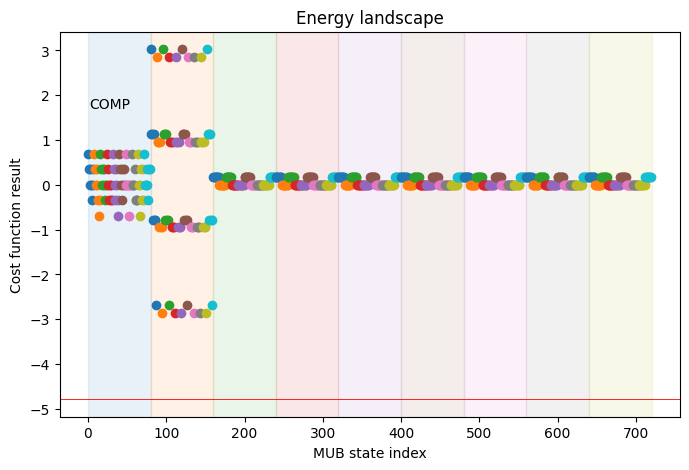

Energy Histogram:


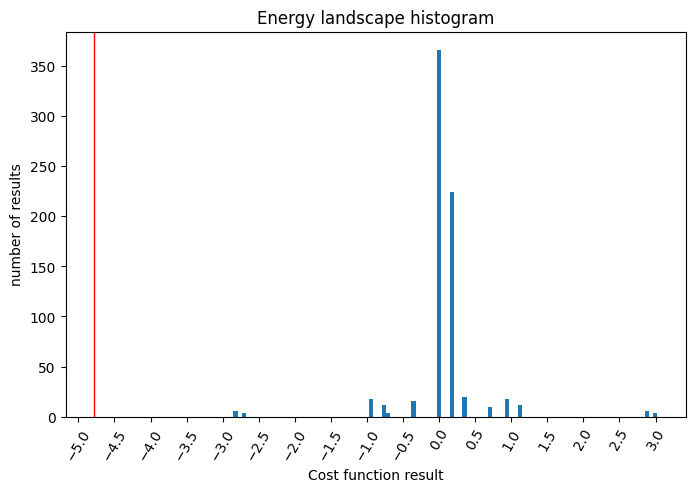

attempting all MUB states over the operator SparsePauliOp(['ZZIIII', 'IZZIII', 'IIZZII', 'IIIZZI', 'IIIIZZ', 'XIIIII', 'IXIIII', 'IIXIII', 'IIIXII', 'IIIIXI', 'IIIIIX'],
              coeffs=[0.17375185+0.j, 0.17375185+0.j, 0.17375185+0.j, 0.17375185+0.j,
 0.17375185+0.j, 0.95087975+0.j, 0.95087975+0.j, 0.95087975+0.j,
 0.95087975+0.j, 0.95087975+0.j, 0.95087975+0.j])
Energy Landscape:


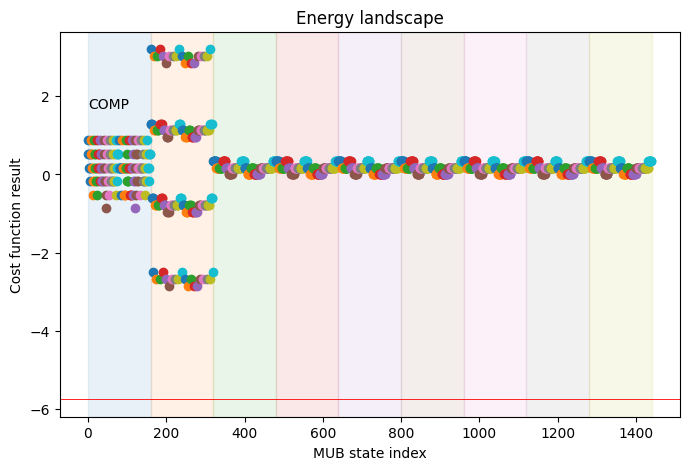

Energy Histogram:


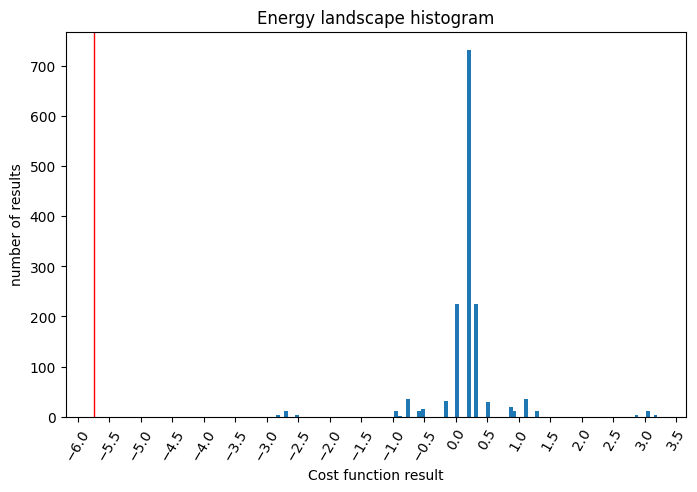

attempting all MUB states over the operator SparsePauliOp(['ZZIIIII', 'IZZIIII', 'IIZZIII', 'IIIZZII', 'IIIIZZI', 'IIIIIZZ', 'XIIIIII', 'IXIIIII', 'IIXIIII', 'IIIXIII', 'IIIIXII', 'IIIIIXI', 'IIIIIIX'],
              coeffs=[0.17375185+0.j, 0.17375185+0.j, 0.17375185+0.j, 0.17375185+0.j,
 0.17375185+0.j, 0.17375185+0.j, 0.95087975+0.j, 0.95087975+0.j,
 0.95087975+0.j, 0.95087975+0.j, 0.95087975+0.j, 0.95087975+0.j,
 0.95087975+0.j])
Energy Landscape:


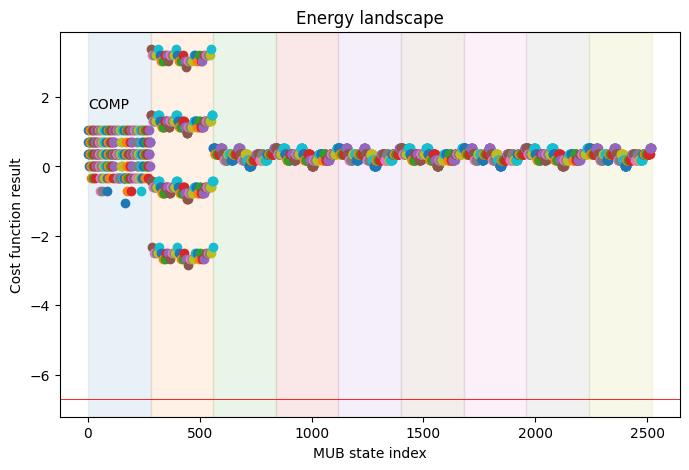

Energy Histogram:


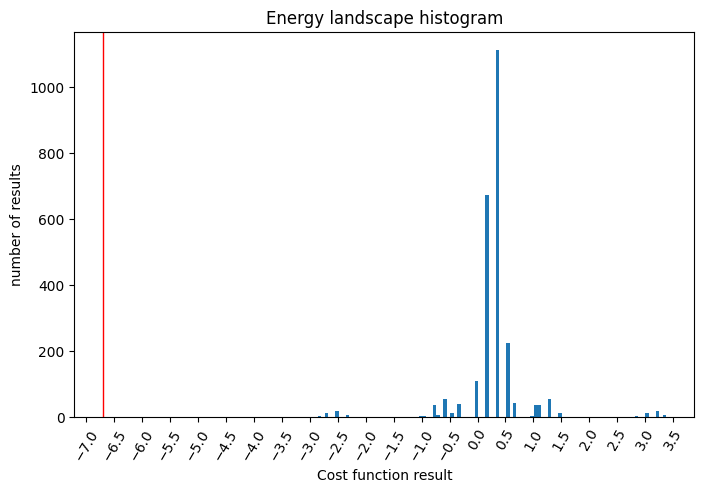

In [26]:
# half-MUB experiments
n_mub_qubits = 3
zz_coeff = random.uniform(0,1)
x_coeff = random.uniform(0,1)

for n_qubits in range(4,8):  # Three examples

    op = gen_trans_ising_op(n_qubits, zz_coeff, x_coeff)
    print(f"attempting all MUB states over the operator {op}")
    results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits))
    results.exact_value = get_exact_ground(op)
    print("Energy Landscape:")
    display_energy_landscape(results)
    print("Energy Histogram:")
    display_energy_histogram(results)

### Unified results: partial-MUB with $\ket{0}$ vs. $\ket{+}$
Here, I run the same experiment with a bit less qubits, but use both options forn qubits not involved in the MUB state itself.
1.  Put it in $\ket{0}$, the trivial option.
2.  Put it in $\ket{+}$, the other option Dekel found to be rather successful.

THE ZERO EXPERIMENTS START
attempting all MUB states over the operator SparsePauliOp(['ZZII', 'IZZI', 'IIZZ', 'XIII', 'IXII', 'IIXI', 'IIIX'],
              coeffs=[0.41393659+0.j, 0.41393659+0.j, 0.41393659+0.j, 0.2836749 +0.j,
 0.2836749 +0.j, 0.2836749 +0.j, 0.2836749 +0.j])
========ZERO VERSION=========
Energy Landscape:


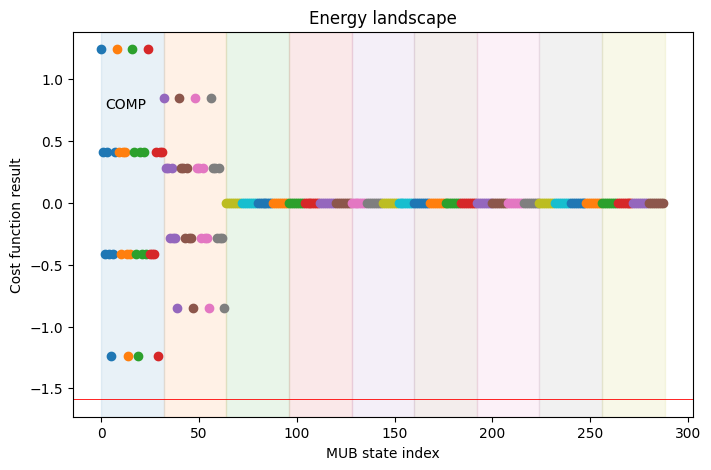

Energy Histogram:


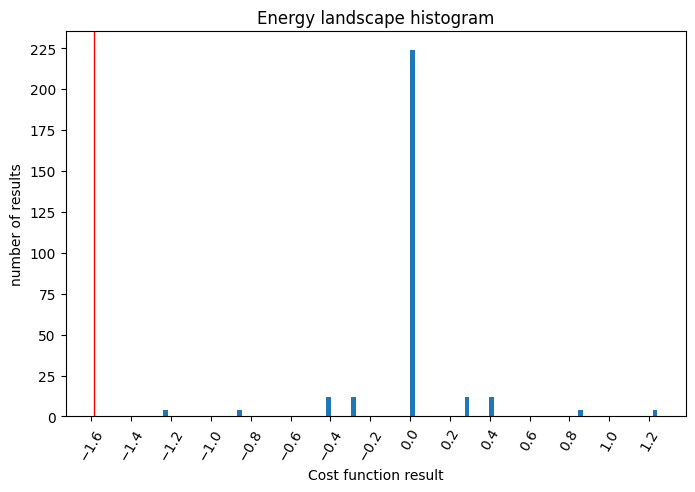

========PLUS VERSION=========
Energy Landscape:


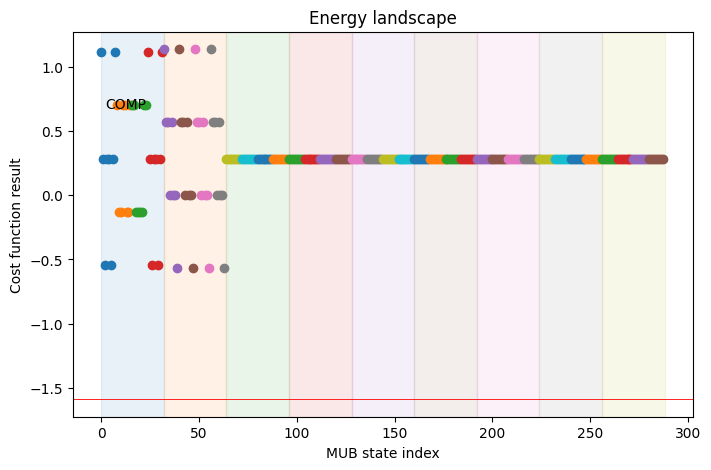

Energy Histogram:


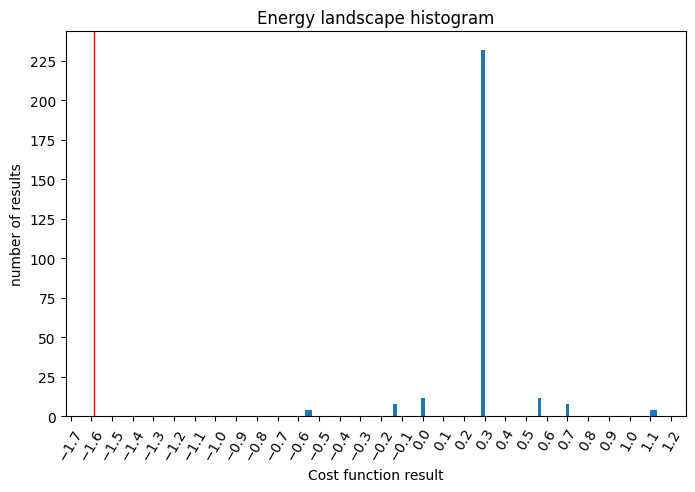

==============END============
attempting all MUB states over the operator SparsePauliOp(['ZZIII', 'IZZII', 'IIZZI', 'IIIZZ', 'XIIII', 'IXIII', 'IIXII', 'IIIXI', 'IIIIX'],
              coeffs=[0.41393659+0.j, 0.41393659+0.j, 0.41393659+0.j, 0.41393659+0.j,
 0.2836749 +0.j, 0.2836749 +0.j, 0.2836749 +0.j, 0.2836749 +0.j,
 0.2836749 +0.j])
========ZERO VERSION=========
Energy Landscape:


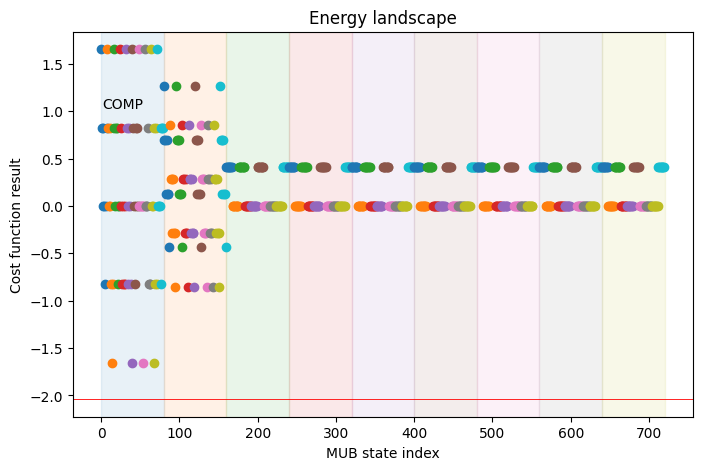

Energy Histogram:


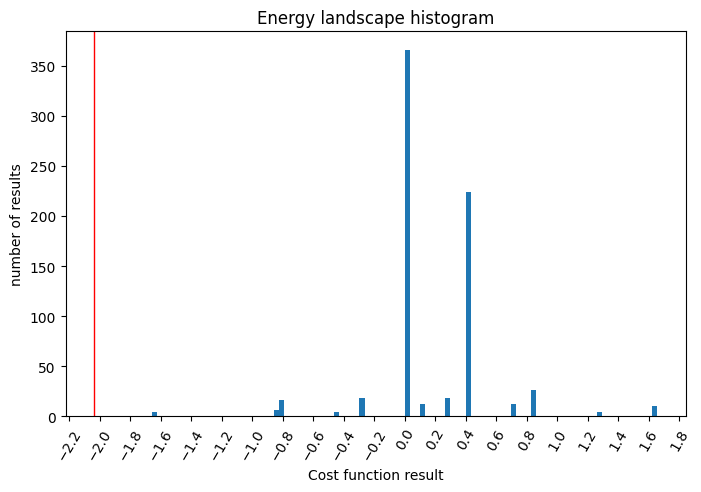

========PLUS VERSION=========
Energy Landscape:


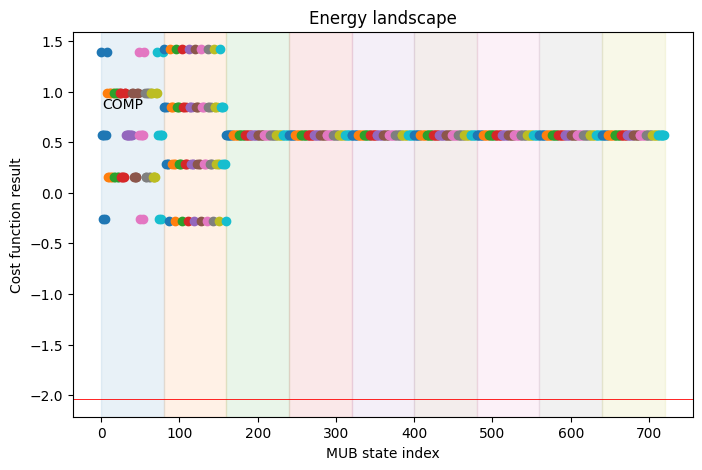

Energy Histogram:


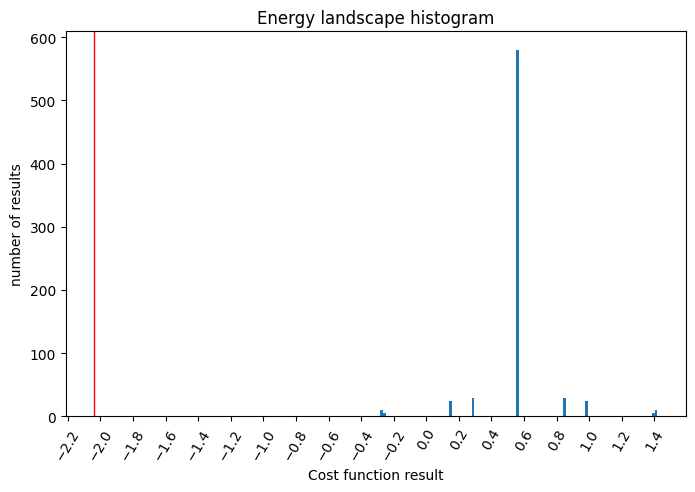

==============END============
attempting all MUB states over the operator SparsePauliOp(['ZZIIII', 'IZZIII', 'IIZZII', 'IIIZZI', 'IIIIZZ', 'XIIIII', 'IXIIII', 'IIXIII', 'IIIXII', 'IIIIXI', 'IIIIIX'],
              coeffs=[0.41393659+0.j, 0.41393659+0.j, 0.41393659+0.j, 0.41393659+0.j,
 0.41393659+0.j, 0.2836749 +0.j, 0.2836749 +0.j, 0.2836749 +0.j,
 0.2836749 +0.j, 0.2836749 +0.j, 0.2836749 +0.j])
========ZERO VERSION=========
Energy Landscape:


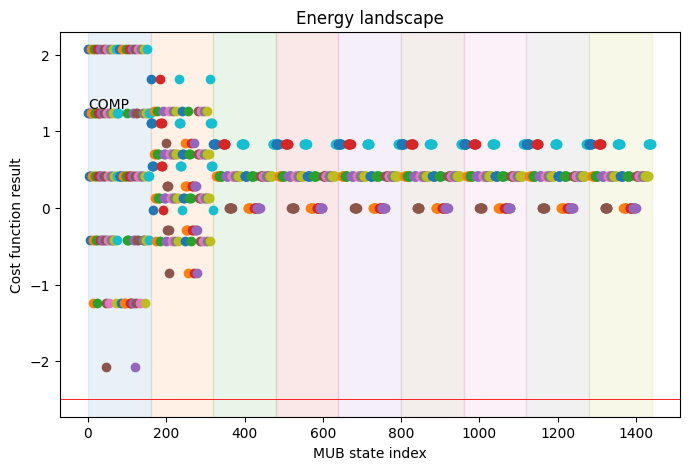

Energy Histogram:


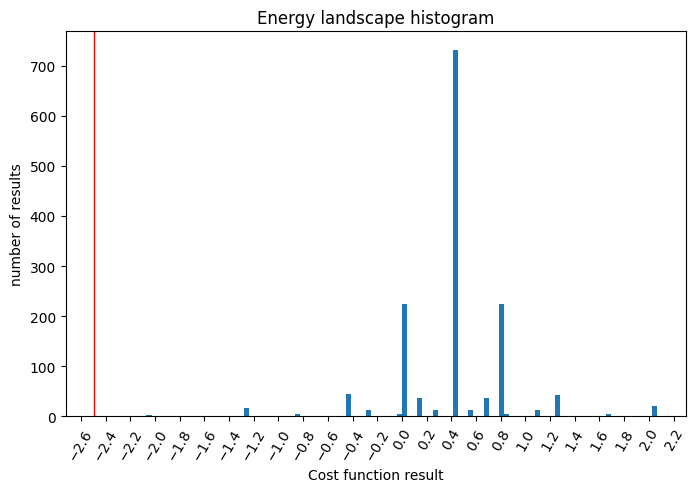

========PLUS VERSION=========
Energy Landscape:


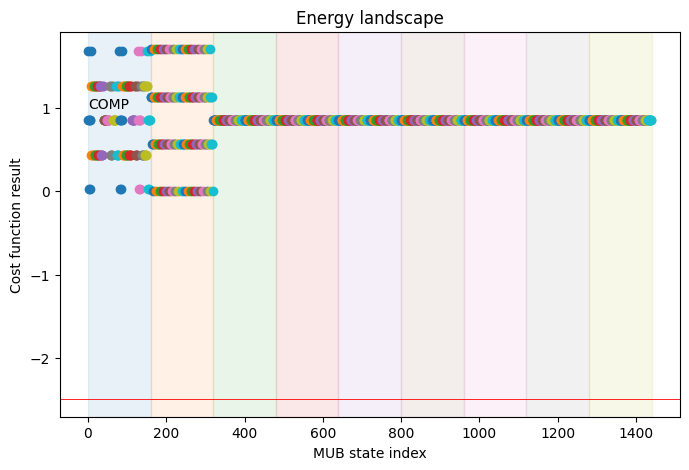

Energy Histogram:


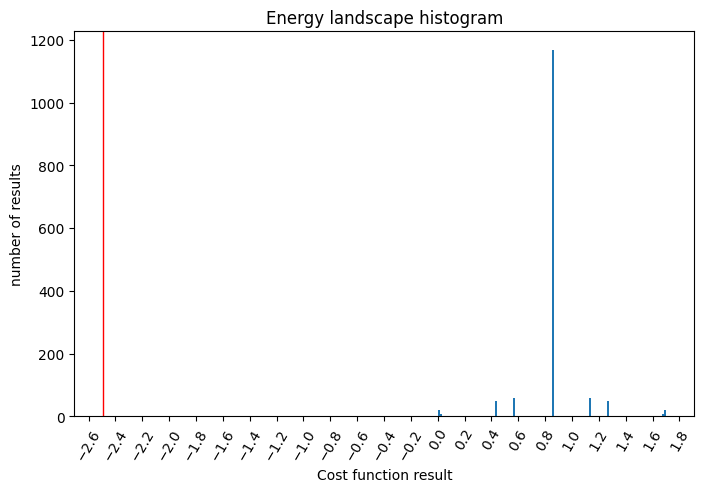

==============END============


In [27]:
# half-MUB experiments
n_mub_qubits = 3
zz_coeff = random.uniform(0,1)
x_coeff = random.uniform(0,1)

print("THE ZERO EXPERIMENTS START")
for n_qubits in range(4,7):  # Three examples
    op = gen_trans_ising_op(n_qubits, zz_coeff, x_coeff)
    print(f"attempting all MUB states over the operator {op}")
    print("========ZERO VERSION=========")
    results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits))
    results.exact_value = get_exact_ground(op)
    print("Energy Landscape:")
    display_energy_landscape(results)
    print("Energy Histogram:")
    display_energy_histogram(results)
    print("========PLUS VERSION=========")
    results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits), plus_for_non_mub=True)
    results.exact_value = get_exact_ground(op)
    print("Energy Landscape:")
    display_energy_landscape(results)
    print("Energy Histogram:")
    display_energy_histogram(results)
    print("==============END============")


## Combined Example with VQE

Energy Landscape:


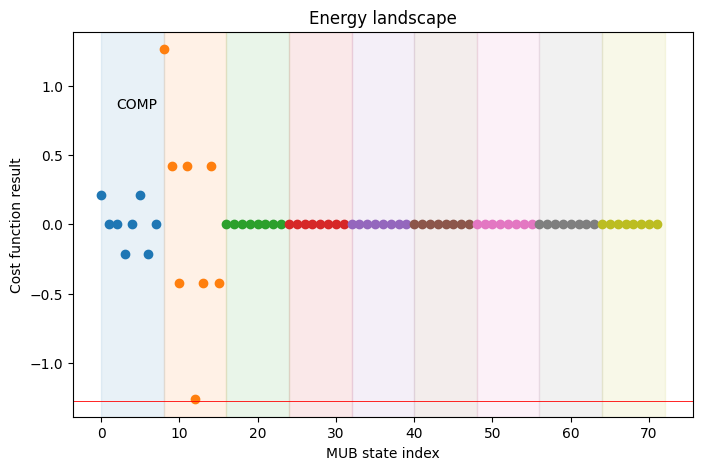

Energy Histogram:


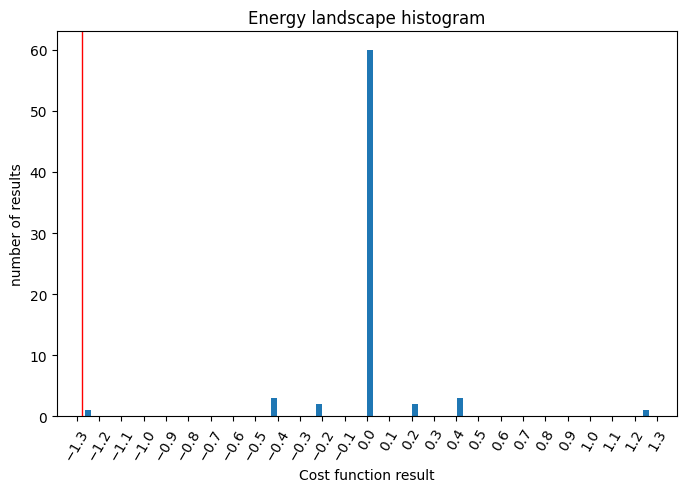

The operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.1058734 +0.j, 0.1058734 +0.j, 0.42089092+0.j, 0.42089092+0.j,
 0.42089092+0.j]) has the exact value -1.2759879464944521.
Now trying to reach the vcalue from different MUB points.
running from state of index MUBIndex(subset_idx=0, mub_idx=1, basis_state_idx=4) and value -1.2626727544
(45, -1.267473642096134, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=1, basis_state_idx=2) and value -0.4208909181


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(401, -1.2660724137172363, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=1, basis_state_idx=5) and value -0.4208909181


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(185, -1.266120109795484, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=1, basis_state_idx=7) and value -0.4208909181


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(159, -1.2670351908872926, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=3) and value -0.2117468022


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(213, -1.2676535722985571, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=6) and value -0.2117468022


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(196, -1.2668238579677886, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=1) and value 0.0


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(141, -1.2697093116679223, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=2) and value 0.0


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(192, -1.2699485521932246, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=4) and value 0.0


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(172, -1.2679849325250832, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=7) and value 0.0


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(148, -1.266134828640497, True)


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


In [7]:
# generate operator
n_qubits = 3
n_mub_qubits = 3
x_coeff = random.uniform(0,1)
zz_coeff = random.uniform(0,1)
op = gen_trans_ising_op(n_qubits, x_coeff, zz_coeff)
exact_result = get_exact_ground(op)

ansatz = TwoLocal(3, ['rx', 'ry', 'rz'], 'cx', 'linear', reps=3, insert_barriers=True).decompose()
zeroset_anastz = ansatz.assign_parameters([0.0]*ansatz.num_parameters)

# calculate landscape and graphs
subsets = generate_all_subsets(n_mub_qubits, n_qubits)
results = calculate_energy_landscape(op, n_mub_qubits, subsets, appended_ansatz=zeroset_anastz)
results.exact_value = exact_result
print("Energy Landscape:")
display_energy_landscape(results)
print("Energy Histogram:")
display_energy_histogram(results)

# run VQE from the best 5 examples
params = get_standard_params(n_qubits)
params.success_bound = 1e-2
params.exact_result = exact_result
params.optimizer = 'COBYLA'
params.report_period=10000
params.report_thetas=False
params.num_of_starting_points = 10

print(f"The operator {op} has the exact value {params.exact_result}.")
print(f"Now trying to reach the vcalue from different MUB points.")
for result in find_k_best_points(results, params.num_of_starting_points):
    print(f"running from state of index {result.index} and value {result.value}")
    print(run_vqe_experiment(hamiltonian=op, ansatz=ansatz, initial_thetas=[0.0]*ansatz.num_parameters, prepened_state_circ=result.state_circuit, params=params))
    

## Convincing results - now with VQE

### 3-qubit experiments

attempting all MUB states over the operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.7313076 +0.j, 0.7313076 +0.j, 0.19310049+0.j, 0.19310049+0.j,
 0.19310049+0.j])
Energy Landscape:


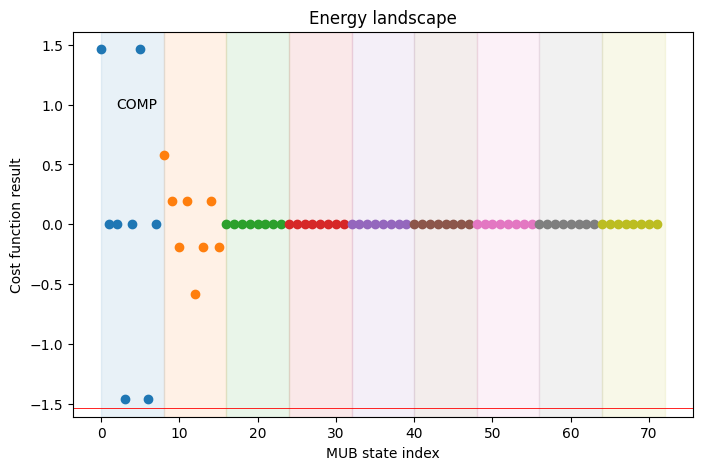

Energy Histogram:


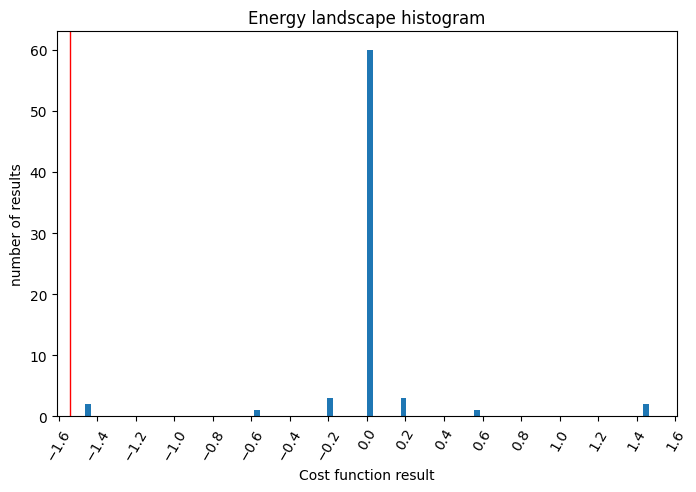

The operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.7313076 +0.j, 0.7313076 +0.j, 0.19310049+0.j, 0.19310049+0.j,
 0.19310049+0.j]) has the exact value -1.5389870086307345.
Now trying to reach the vcalue from different MUB points.
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=3) and value -1.4626151915
(1238, -1.5340060570735694, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=6) and value -1.4626151915


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(1373, -1.5340176481501466, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=1, basis_state_idx=4) and value -0.5793014817


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(184, -1.5345882660425159, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=1, basis_state_idx=2) and value -0.1931004939


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(683, -1.534108080062148, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=1, basis_state_idx=5) and value -0.1931004939


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(309, -1.5341433401270819, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=1, basis_state_idx=7) and value -0.1931004939


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(2165, -1.5339919873763046, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=1) and value 0.0


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(184, -1.5342463531210657, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=2) and value 0.0


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(771, -1.5340110697823062, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=4) and value 0.0


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(569, -1.5339938472539119, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=7) and value 0.0


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(3000, -1.527027134594062, False)



=============EXPERIMENT END================


attempting all MUB states over the operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.77659281+0.j, 0.77659281+0.j, 0.07153246+0.j, 0.07153246+0.j,
 0.07153246+0.j])
Energy Landscape:


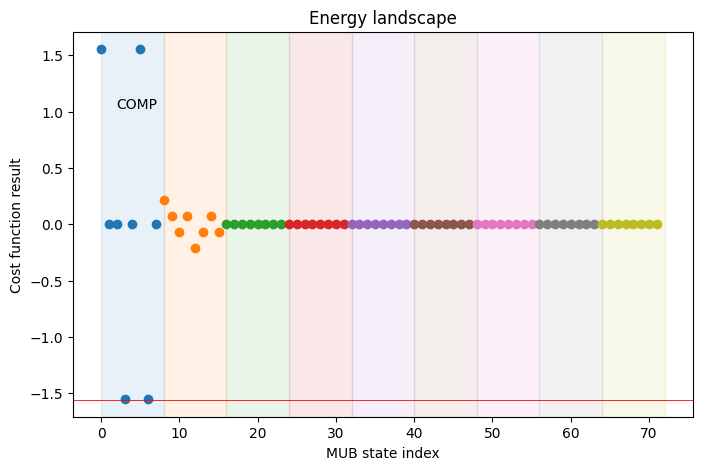

Energy Histogram:


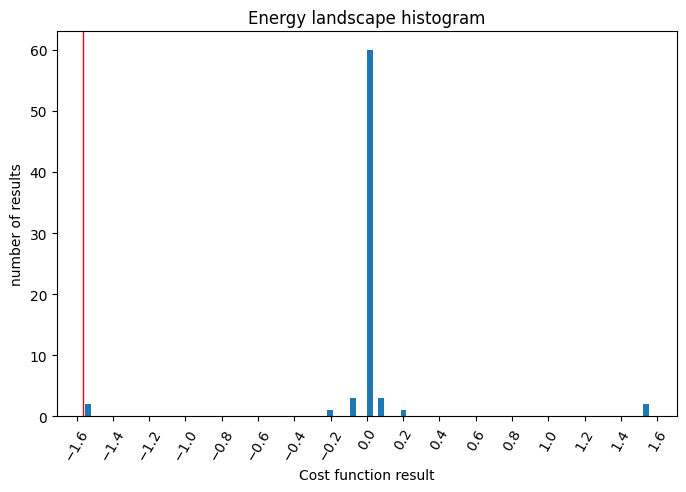

The operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.77659281+0.j, 0.77659281+0.j, 0.07153246+0.j, 0.07153246+0.j,
 0.07153246+0.j]) has the exact value -1.5620290011391242.
Now trying to reach the vcalue from different MUB points.
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=3) and value -1.5531856183
(115, -1.557683651282096, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=6) and value -1.5531856183


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(53, -1.5577079466588708, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=1, basis_state_idx=4) and value -0.2145973683


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(155, -1.5574701877477, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=1, basis_state_idx=2) and value -0.0715324561


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(218, -1.557347822083445, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=1, basis_state_idx=5) and value -0.0715324561


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(200, -1.5574486915596941, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=1, basis_state_idx=7) and value -0.0715324561


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(276, -1.557382477499491, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=1) and value 0.0


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(190, -1.5572800429284555, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=2) and value 0.0


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(169, -1.5578737590612899, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=4) and value 0.0


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(256, -1.558123160112084, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=7) and value 0.0


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(250, -1.5571305932888029, True)



=============EXPERIMENT END================


attempting all MUB states over the operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.88919943+0.j, 0.88919943+0.j, 0.35596426+0.j, 0.35596426+0.j,
 0.35596426+0.j])


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


Energy Landscape:


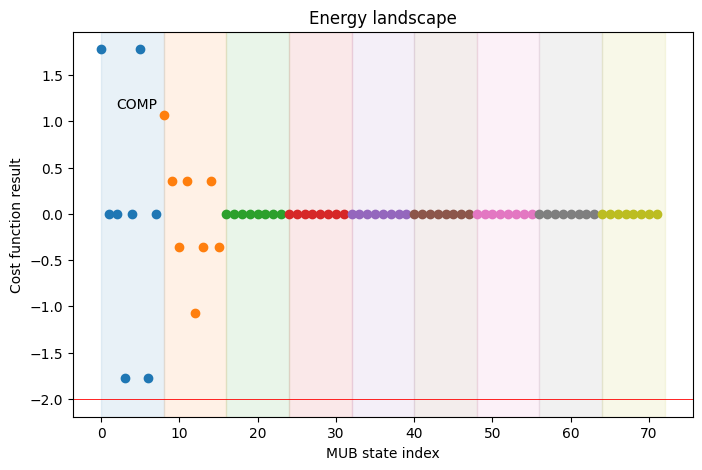

Energy Histogram:


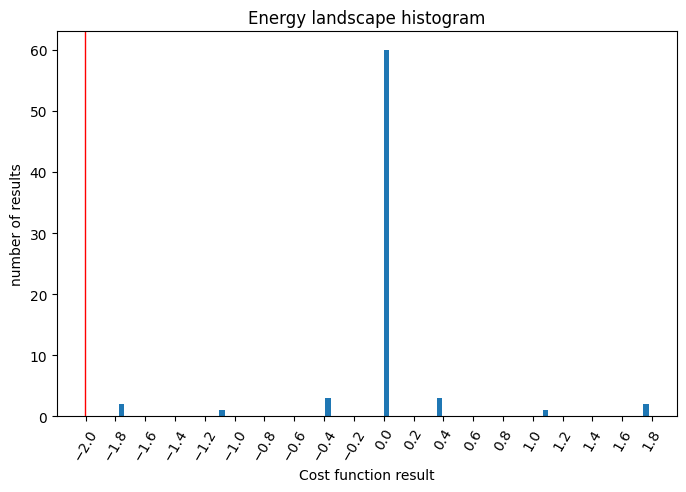

The operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.88919943+0.j, 0.88919943+0.j, 0.35596426+0.j, 0.35596426+0.j,
 0.35596426+0.j]) has the exact value -2.003803909289677.
Now trying to reach the vcalue from different MUB points.
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=3) and value -1.7783988596
(709, -1.9988610223199892, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=6) and value -1.7783988596


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(992, -1.9988172002095006, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=1, basis_state_idx=4) and value -1.0678927731


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(210, -1.9998667363603946, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=1, basis_state_idx=2) and value -0.3559642577


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(965, -1.9988184639211393, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=1, basis_state_idx=5) and value -0.3559642577


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(281, -1.9988712470624104, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=1, basis_state_idx=7) and value -0.3559642577


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(3000, -1.9722718029646797, False)
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=1) and value 0.0
(321, -1.9988611687397289, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=2) and value 0.0


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(462, -1.9989760257475582, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=4) and value 0.0


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(479, -1.9990671028844054, True)
running from state of index MUBIndex(subset_idx=0, mub_idx=0, basis_state_idx=7) and value 0.0


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


(931, -1.998880159059238, True)



=============EXPERIMENT END================




capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


In [8]:
n_qubits = 3
n_mub_qubits = 3

for _ in range(3):  # Three examples
    zz_coeff = random.uniform(0,1)
    x_coeff = random.uniform(0,1)
    op = gen_trans_ising_op(n_qubits, zz_coeff, x_coeff)

    ansatz = TwoLocal(3, ['rx', 'ry', 'rz'], 'cx', 'linear', reps=3, insert_barriers=True).decompose()
    zeroset_anastz = ansatz.assign_parameters([0.0]*ansatz.num_parameters)

    print(f"attempting all MUB states over the operator {op}")
    results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits), appended_ansatz=zeroset_anastz)
    results.exact_value = get_exact_ground(op)
    print("Energy Landscape:")
    display_energy_landscape(results)
    print("Energy Histogram:")
    display_energy_histogram(results)

    # run VQE from the best 10 examples
    params = get_standard_params(n_qubits)
    params.exact_result = results.exact_value
    params.report_period = 10000
    params.max_iter = 3000
    params.success_bound = 5e-3
    params.num_of_starting_points = 10

    print(f"The operator {op} has the exact value {params.exact_result}.")
    print(f"Now trying to reach the vcalue from different MUB points.")
    for result in find_k_best_points(results, params.num_of_starting_points):
        print(f"running from state of index {result.index} and value {result.value}")
        print(run_vqe_experiment(hamiltonian=op, ansatz=ansatz, initial_thetas=[0.0]*ansatz.num_parameters, prepened_state_circ=result.state_circuit, params=params))

    print("\n\n\n=============EXPERIMENT END================\n\n")

attempting all MUB states over the operator SparsePauliOp(['ZZII', 'IZZI', 'IIZZ', 'XIII', 'IXII', 'IIXI', 'IIIX'],
              coeffs=[0.67464346+0.j, 0.67464346+0.j, 0.67464346+0.j, 0.31887768+0.j,
 0.31887768+0.j, 0.31887768+0.j, 0.31887768+0.j])
Energy Landscape:


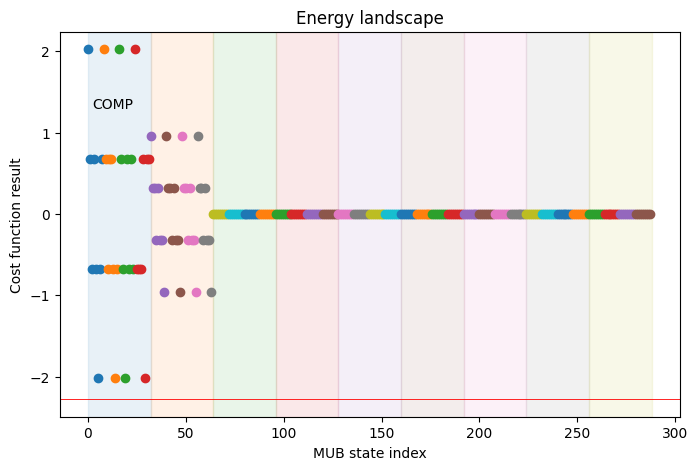

Energy Histogram:


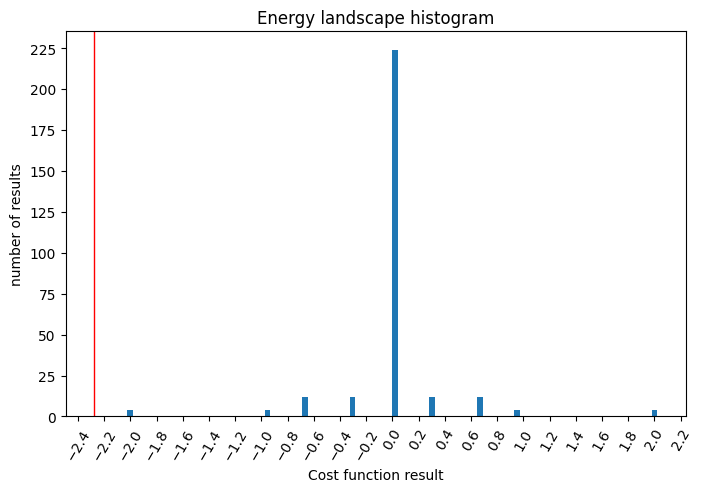

The operator SparsePauliOp(['ZZII', 'IZZI', 'IIZZ', 'XIII', 'IXII', 'IIXI', 'IIIX'],
              coeffs=[0.67464346+0.j, 0.67464346+0.j, 0.67464346+0.j, 0.31887768+0.j,
 0.31887768+0.j, 0.31887768+0.j, 0.31887768+0.j]) has the exact value -2.279138897905214.
Now trying to reach the vcalue from different MUB points.
running from state of index (0, 0, 5) and value -2.0239303699
(2719, -2.274146912450329, True)
running from state of index (1, 0, 6) and value -2.0239303699
(2609, -2.274142844568297, True)
running from state of index (2, 0, 3) and value -2.0239303699
(2719, -2.274146912450329, True)
running from state of index (3, 0, 5) and value -2.0239303699
(2609, -2.274142844568297, True)
running from state of index (0, 1, 7) and value -0.956633042
(3377, -2.274141140950746, True)
running from state of index (1, 1, 7) and value -0.956633042
(2015, -2.2741458127062706, True)
running from state of index (2, 1, 7) and value -0.956633042
(3976, -2.2741647795877014, True)
running from stat

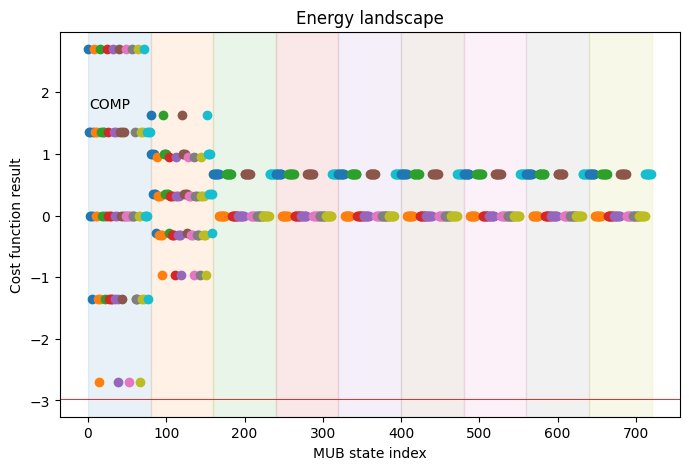

Energy Histogram:


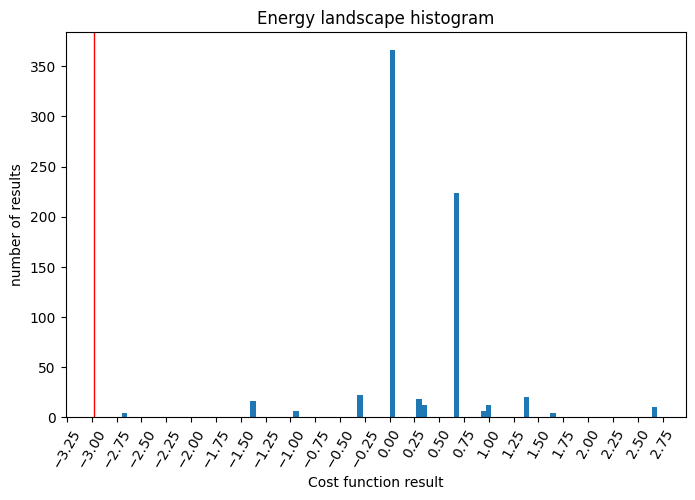

The operator SparsePauliOp(['ZZIII', 'IZZII', 'IIZZI', 'IIIZZ', 'XIIII', 'IXIII', 'IIXII', 'IIIXI', 'IIIIX'],
              coeffs=[0.67464346+0.j, 0.67464346+0.j, 0.67464346+0.j, 0.67464346+0.j,
 0.31887768+0.j, 0.31887768+0.j, 0.31887768+0.j, 0.31887768+0.j,
 0.31887768+0.j]) has the exact value -2.9793791246660244.
Now trying to reach the vcalue from different MUB points.
running from state of index (1, 0, 6) and value -2.6985738265
(5000, -2.952657687911982, False)
running from state of index (4, 0, 7) and value -2.6985738265
(5000, -2.96685961614148, False)
running from state of index (6, 0, 5) and value -2.6985738265
(5000, -2.952657687911982, False)
running from state of index (8, 0, 3) and value -2.6985738265
(5000, -2.952657687911982, False)
running from state of index (0, 0, 5) and value -1.3492869133
(2915, -2.974381294620298, True)
running from state of index (1, 0, 5) and value -1.3492869133
(5000, -2.966152446993172, False)
running from state of index (1, 0, 7) and value 

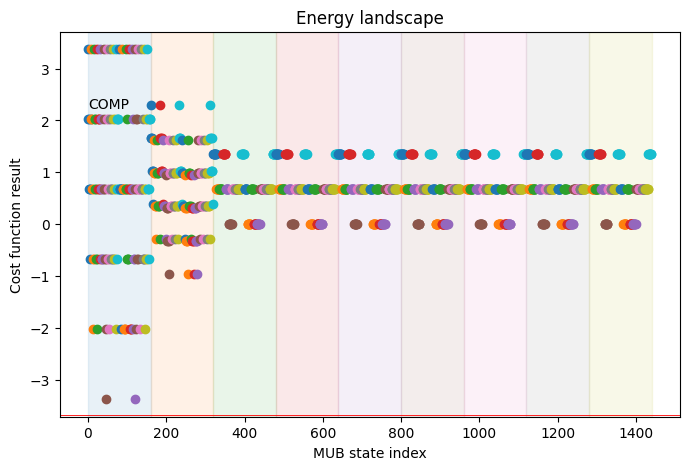

Energy Histogram:


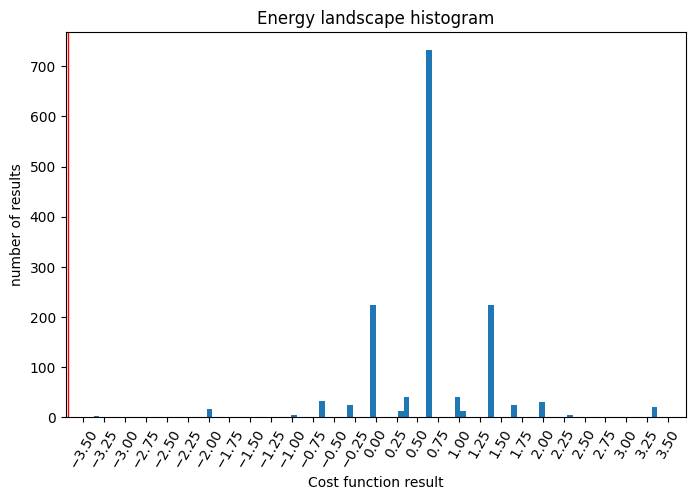

The operator SparsePauliOp(['ZZIIII', 'IZZIII', 'IIZZII', 'IIIZZI', 'IIIIZZ', 'XIIIII', 'IXIIII', 'IIXIII', 'IIIXII', 'IIIIXI', 'IIIIIX'],
              coeffs=[0.67464346+0.j, 0.67464346+0.j, 0.67464346+0.j, 0.67464346+0.j,
 0.67464346+0.j, 0.31887768+0.j, 0.31887768+0.j, 0.31887768+0.j,
 0.31887768+0.j, 0.31887768+0.j, 0.31887768+0.j]) has the exact value -3.686051898001585.
Now trying to reach the vcalue from different MUB points.
running from state of index (5, 0, 7) and value -3.3732172832
(6000, -3.667698112710174, False)
running from state of index (14, 0, 7) and value -3.3732172832
(6000, -3.675592054539366, False)
running from state of index (1, 0, 6) and value -2.0239303699
(6000, -3.6758308549896634, False)
running from state of index (2, 0, 6) and value -2.0239303699
(6000, -3.6759333260657217, False)
running from state of index (5, 0, 6) and value -2.0239303699
(6000, -3.6743090758540955, False)
running from state of index (6, 0, 7) and value -2.0239303699
(6000, -3.675821

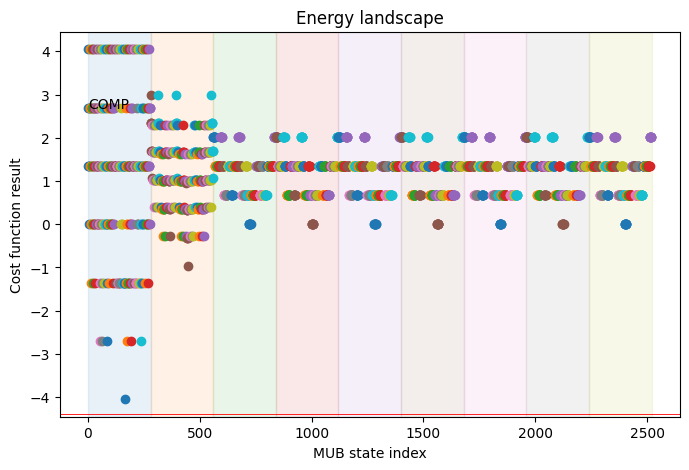

Energy Histogram:


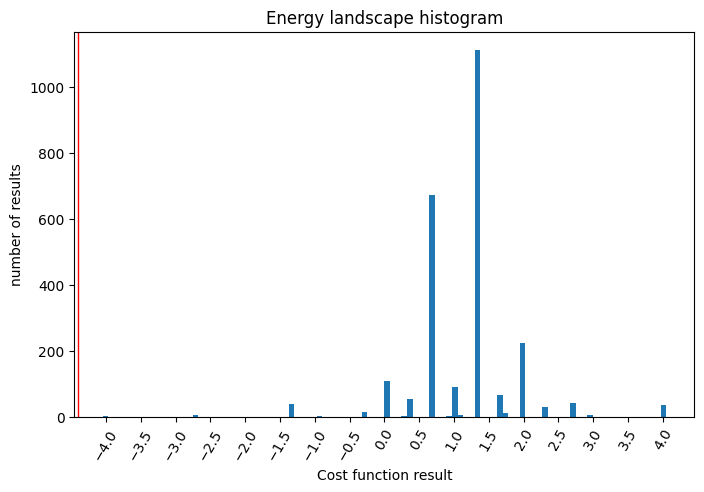

The operator SparsePauliOp(['ZZIIIII', 'IZZIIII', 'IIZZIII', 'IIIZZII', 'IIIIZZI', 'IIIIIZZ', 'XIIIIII', 'IXIIIII', 'IIXIIII', 'IIIXIII', 'IIIIXII', 'IIIIIXI', 'IIIIIIX'],
              coeffs=[0.67464346+0.j, 0.67464346+0.j, 0.67464346+0.j, 0.67464346+0.j,
 0.67464346+0.j, 0.67464346+0.j, 0.31887768+0.j, 0.31887768+0.j,
 0.31887768+0.j, 0.31887768+0.j, 0.31887768+0.j, 0.31887768+0.j,
 0.31887768+0.j]) has the exact value -4.39593215362182.
Now trying to reach the vcalue from different MUB points.
running from state of index (20, 0, 7) and value -4.0478607398
(7000, -4.348738011204382, False)
running from state of index (6, 0, 7) and value -2.6985738265
(7000, -4.384893044837767, False)
running from state of index (7, 0, 7) and value -2.6985738265
(7000, -4.301574513592649, False)
running from state of index (10, 0, 7) and value -2.6985738265
(7000, -4.349015480553434, False)
running from state of index (21, 0, 7) and value -2.6985738265
(7000, -4.388557716351995, False)
running from s

In [5]:
# half-MUB experiments
n_mub_qubits = 3
zz_coeff = random.uniform(0,1)
x_coeff = random.uniform(0,1)

for n_qubits in range(4,8):  # Three examples

    ansatz = TwoLocal(n_qubits, ['rx', 'ry', 'rz'], 'cx', 'linear', reps=n_qubits, insert_barriers=True).decompose()
    zeroset_anastz = ansatz.assign_parameters([0.0]*ansatz.num_parameters)

    op = gen_trans_ising_op(n_qubits, zz_coeff, x_coeff)
    print(f"attempting all MUB states over the operator {op}")
    results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits))
    exact_result = get_exact_ground(op)
    print("Energy Landscape:")
    display_energy_landscape(results, exact_result=exact_result)
    print("Energy Histogram:")
    display_energy_histogram(results, exact_result=exact_result)

    # run VQE from the best 10 examples
    params = get_standard_params(n_qubits)
    params.exact_result = exact_result
    params.report_period = 10000
    params.max_iter = 1000*n_qubits
    params.success_bound = 5e-3
    params.num_of_starting_points = 10

    print(f"The operator {op} has the exact value {params.exact_result}.")
    print(f"Now trying to reach the vcalue from different MUB points.")
    for result in find_k_best_points(results, params.num_of_starting_points):
        print(f"running from state of index {result.index} and value {result.value}")
        print(run_vqe_experiment(hamiltonian=op, ansatz=ansatz, initial_thetas=[0.0]*ansatz.num_parameters, prepened_state_circ=result.state_circuit, params=params))

    print("\n\n\n=============EXPERIMENT END================\n\n")

## My interpretation of the results

For all >3 qubit experiments, it looks like te execution got stuck in some local minima.
I might have to use more repetitions to actually check if this holds, as well as a bigger max_iter.
This might be a situation of ansatz in-expressiveness, rather than local minima.